In [1]:
import numpy as np
from astropy.io import fits
import datetime 
import matplotlib.pyplot as plt
# from matplotlib import cm
##from validation import *
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
from skimage.transform import resize
import os
import sys
sys.path.append('../radiospectra2')

# import radiospectra2
from radiospectra.sources import CallistoSpectrogram
# #import julian

C:\Users\delbe\OneDrive\Desktop\eCallistoValidation\validation\Orfees\../radiospectra2\radiospectra\version.py:12: UserWarning: could not determine radiospectra package version; this indicates a broken installation
  warnings.warn(


In [2]:
class OrfeesSpectrogram(CallistoSpectrogram):
    
    def __init__(self, file=None):
        data = {}
        
        if file:
            data = self.read_orfees(file)
               
        self.__init_values__(**data)
            
    def __init_values__(self, **kwargs):
        self.data = kwargs.get("data", None)
        self.time_axis = kwargs.get("time_axis", None)
        self.freq_axis = kwargs.get("freq_axis", None)
        self.date_obs = kwargs.get("date_obs", None)
        self.time_start_obs = kwargs.get("time_start_obs", None)
        self.time_end_obs = kwargs.get("time_end_obs", None)


    def read_orfees(self, filename):
        hdulist=fits.open(filename)

        h_file = hdulist[0].header
        frequency = hdulist[1].data
        h_data = hdulist[2].data 


        date_obs = h_file[4]
        time_start_obs = h_file[5]
        time_end_obs = h_file[7]

        data_SI_B1 = h_data.STOKESI_B1
        data_SI_B2 = h_data.STOKESI_B2
        data_SI_B3 = h_data.STOKESI_B3
        data_SI_B4 = h_data.STOKESI_B4
        data_SI_B5 = h_data.STOKESI_B5

        time_axis = h_data.TIME_B1

        freq_b1=frequency.FREQ_B1[0]
        freq_b2=frequency.FREQ_B2[0]
        freq_b3=frequency.FREQ_B3[0]
        freq_b4=frequency.FREQ_B4[0]
        freq_b5=frequency.FREQ_B5[0]

        freq_axis = np.concatenate([freq_b1,freq_b2,freq_b3,freq_b4,freq_b5])

        data = np.concatenate([data_SI_B1,data_SI_B2,data_SI_B3,data_SI_B4,data_SI_B5],axis=1)

        return {
            "data": data,
            "time_axis": time_axis,
            "freq_axis": freq_axis,
            "date_obs": date_obs,
            "time_start_obs": time_start_obs,
            "time_end_obs": time_end_obs
        }


    def peek(self, size=(20, 5), dtFmt='%Y-%m-%d %H:%M:%S:%f'):
        
        date_start = self.date_obs + " "+ self.time_start_obs 
        
        vmax, vmin, vmean = self.data.max(), self.data.min(), self.data.mean()
        
        fig, ax = plt.subplots(figsize=size) # , dpi = 80
        xa = ax.get_xaxis()
        ax.tick_params(axis='x', labelrotation = 50)
        
        xa.set_major_formatter(FuncFormatter(
                lambda x, pos: (
                    datetime.datetime.strptime(date_start, dtFmt) + datetime.timedelta(seconds=x)).replace(microsecond=0)
                )
            )
    
        #im = plt.imshow(np.array(self.data), vmin=vmin, vmax=1000, aspect = "auto")
        im = plt.imshow(np.array(self.data).transpose(),vmin=vmin, vmax=1000) # .transpose():permutes or reserves the dimension of the given array and returns the modified array.

        fig.colorbar(im, label="Intensity")
        
        plt.title(f"{date_start}")
        plt.xlabel('Time[UT]')
        plt.ylabel('Frequency [MHz]')
        
        plt.show()

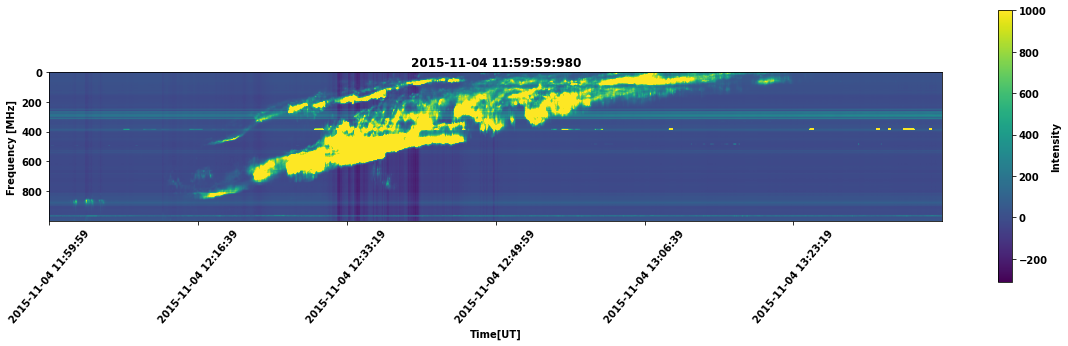

In [29]:
spec_orfees = OrfeesSpectrogram("./orfees_files/int_orf20151104_120000_0.1.fts")
spec_orfees.remove_single_freq_rfi
spec2 = spec_orfees.subtract_bg("subtract_bg_sliding_window")
spec2.peek()
# spec3 = spec2.subtract_bg("elimwrongchannels")
# spec3.peek()

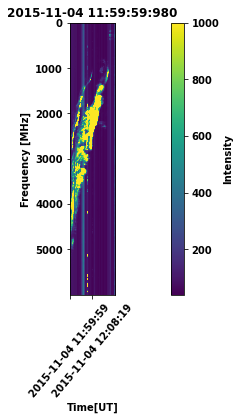

In [25]:
spec_test = OrfeesSpectrogram("./orfees_files/int_orf20151104_120000_0.1.fts")
spec_test.peek()

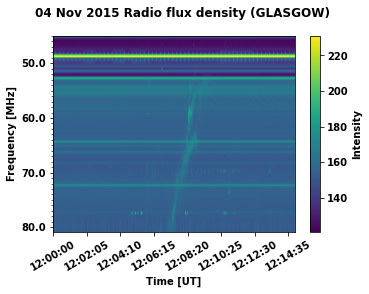

In [13]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2015/11/04/GLASGOW_20151104_120000_59.fit.gz')
spec.peek()
plt.show()

In [7]:
# spec_orfees_1 = OrfeesSpectrogram("./orfees_files/int_orf20211112_073000_10.fts")
# # spec3 = spec_orfees_1.subtract_bg("constbacksub")
# spec_orfees_1.peek()

In [6]:
!pip install scikit-learn --force-reinstall

  Using cached scikit_learn-1.1.3-cp38-cp38-win_amd64.whl (7.5 MB)
     --------------------------------------- 14.7/14.7 MB 15.6 MB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached scipy-1.9.3-cp38-cp38-win_amd64.whl (39.8 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3
  Attempting uninstall: scikit-learn
    Found 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sunpy 4.0.0 requires astropy>=4.2.1, which is not installed.
resampy 0.2.2 requires numba>=0.32, which is not installed.
reproject 0.8 requires astropy>=3.2, which is not installed.
pytest-arraydiff 0.5.0 requires pytest>=4.6, which is not installed.
py-pol 1.0.5 requires sympy, which is not installed.
librosa 0.8.0 requires numba>=0.43.0, which is not installed.
hickle 4.0.4 requires h5py<3.0.0,>=2.8.0, which is not installed.
astropy-healpix 0.6 requires astropy, which is not installed.
asdf-astropy 0.2.1 requires astropy>=5.0.4, which is not installed.


In [6]:
# spec_orfees_2 = OrfeesSpectrogram("./orfees_files/int_orf20160718_080000_10.fts")
# # spec4 = spec_orfees_2.subtract_bg("constbacksub")
# spec_orfees_2.peek()

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms 
from sklearn.calibration import calibration_curve

spec_orfees = OrfeesSpectrogram("./orfees_files/int_orf20151104_120000_0.1.fts")
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2015/11/04/GLASGOW_20151104_120000_59.fit.gz')

data_orfees= spec_orfees.data
data_spec = spec.data

## the tested 

# prob_true, prob_pred = calibration_curve(y_test, probs, n_bins=5)

# fig, ax = plt.subplots()
# # plt.plot(data_orfees)

ModuleNotFoundError: No module named 'sklearn'

In [5]:
class OrfeesSpectrogram:
    
    def __init__(self, file=None):
        data = {}
        
        if file:
            data = self.read_orfees(file)
               
        self.__init_values__(**data)
            
    def __init_values__(self, **kwargs):
        self.data = kwargs.get("data", None)
        self.time_axis = kwargs.get("time_axis", None)
        self.freq_axis = kwargs.get("freq_axis", None)
        self.date_obs = kwargs.get("date_obs", None)
        self.time_start_obs = kwargs.get("time_start_obs", None)
        self.time_end_obs = kwargs.get("time_end_obs", None)


    def read_orfees(self, filename):
        hdulist=fits.open(filename)

        h_file = hdulist[0].header
        frequency = hdulist[1].data
        h_data = hdulist[2].data 


        date_obs = h_file[4]
        time_start_obs = h_file[5]
        time_end_obs = h_file[7]

        data_SI_B1 = h_data.STOKESI_B1
        data_SI_B2 = h_data.STOKESI_B2
        data_SI_B3 = h_data.STOKESI_B3
        data_SI_B4 = h_data.STOKESI_B4
        data_SI_B5 = h_data.STOKESI_B5

        time_axis = h_data.TIME_B1

        freq_b1=frequency.FREQ_B1[0]
        freq_b2=frequency.FREQ_B2[0]
        freq_b3=frequency.FREQ_B3[0]
        freq_b4=frequency.FREQ_B4[0]
        freq_b5=frequency.FREQ_B5[0]

        freq_axis = np.concatenate([freq_b1,freq_b2,freq_b3,freq_b4,freq_b5])

        data = np.concatenate([data_SI_B1,data_SI_B2,data_SI_B3,data_SI_B4,data_SI_B5],axis=1)

        return {
            "data": data,
            "time_axis": time_axis,
            "freq_axis": freq_axis,
            "date_obs": date_obs,
            "time_start_obs": time_start_obs,
            "time_end_obs": time_end_obs
        }


    def peek(self, size=(20, 5), dtFmt='%Y-%m-%d %H:%M:%S:%f'):
        
        date_start = self.date_obs + " "+ self.time_start_obs 
        
        vmax, vmin, vmean = self.data.max(), self.data.min(), self.data.mean()
        
        fig, ax = plt.subplots(figsize=size, dpi = 80)
        xa = ax.get_xaxis()
        ax.tick_params(axis='x', labelrotation = 50)
        
        xa.set_major_formatter(FuncFormatter(
                lambda x, pos: (
                    datetime.datetime.strptime(date_start, dtFmt) + datetime.timedelta(seconds=x)).replace(microsecond=0)
                )
            )
    
        im = plt.imshow(np.array(self.data), vmin=vmin, vmax=1000, aspect = "auto")
        # im = plt.imshow(np(self.data), vmin=vmin, vmax=1000, aspect = "auto")
    
        fig.colorbar(im, label="Intensity")
        #y = self.freq_axis
        #ax.set_ylim(min(y), max(y))
        
        plt.title(f"{date_start}")
        plt.xlabel('Time[UT]')
        plt.ylabel('Frequency [MHz]')
        
        plt.show()

To Do :
- Create a read metod.
- Create a select time method where we can select the timeRange we need. 

In [6]:
import sys 
print(sys.executable)

C:\Users\delbe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe


int_orf20151104_120000_0.1.fts


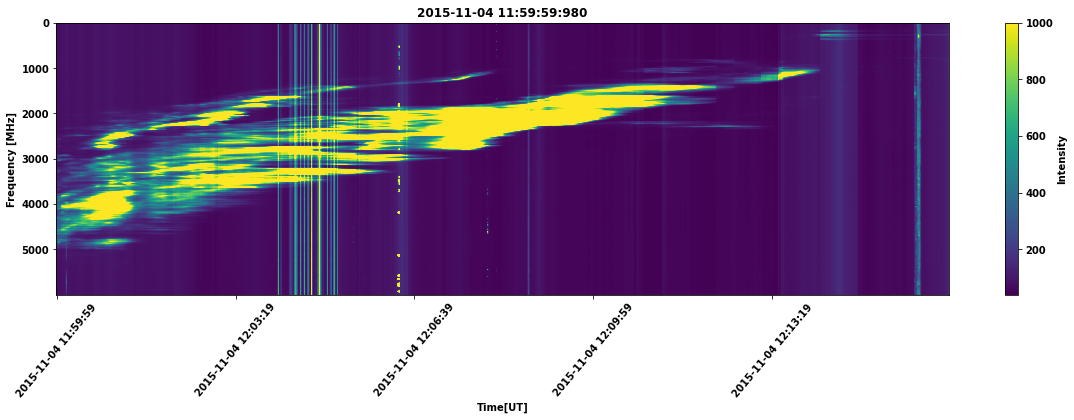

int_orf20160718_080000_10.fts


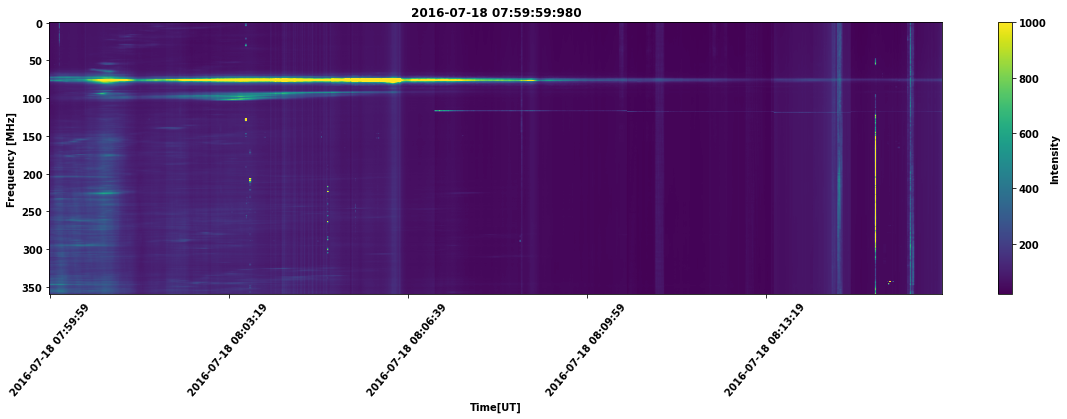

int_orf20170201_080000_10.fts


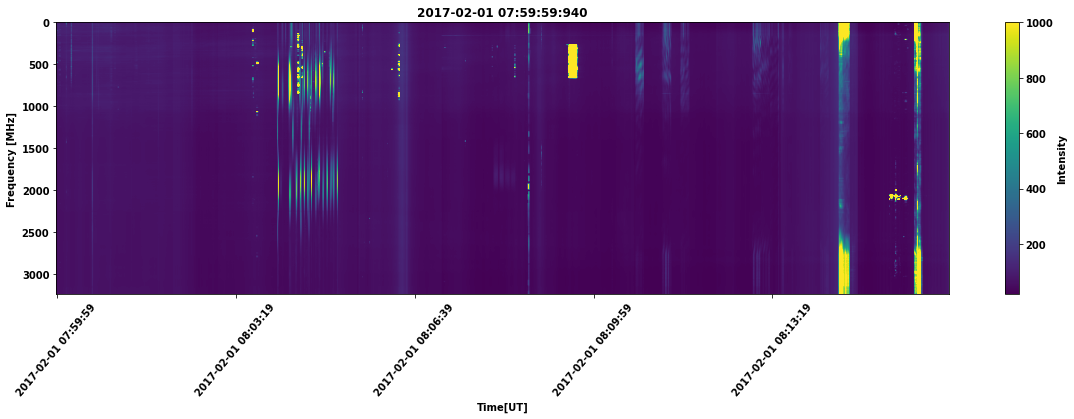

int_orf20170211_080000_10.fts


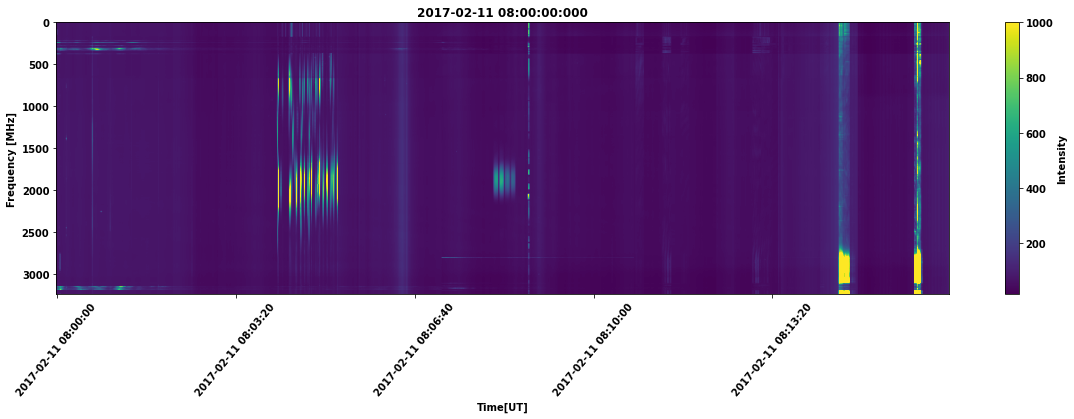

int_orf20170403_130000_10.fts


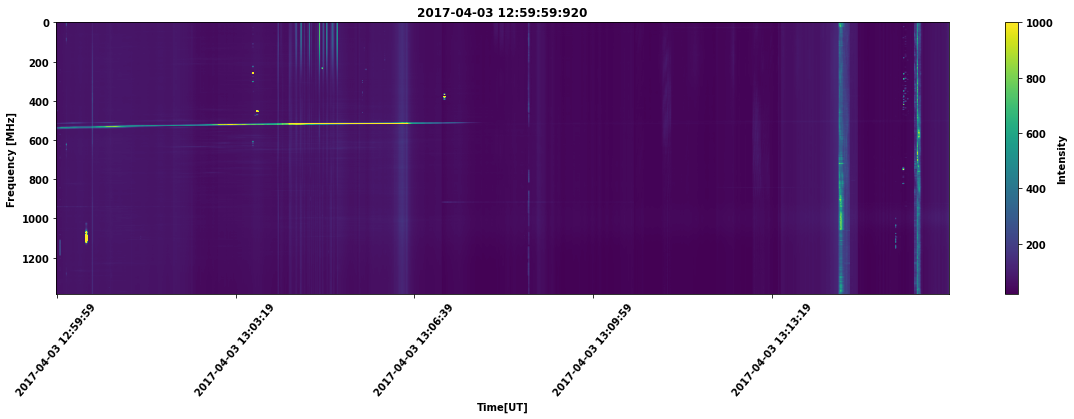

int_orf20170405_080000_10.fts


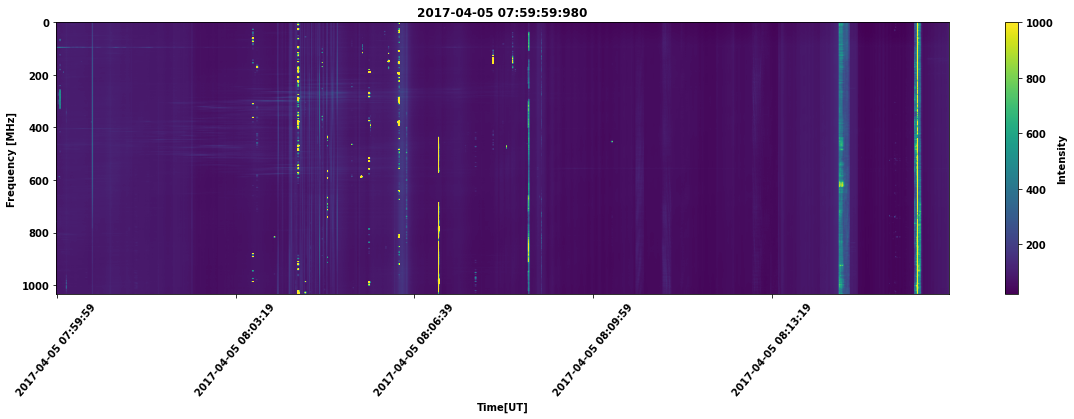

int_orf20170713_140000_10.fts


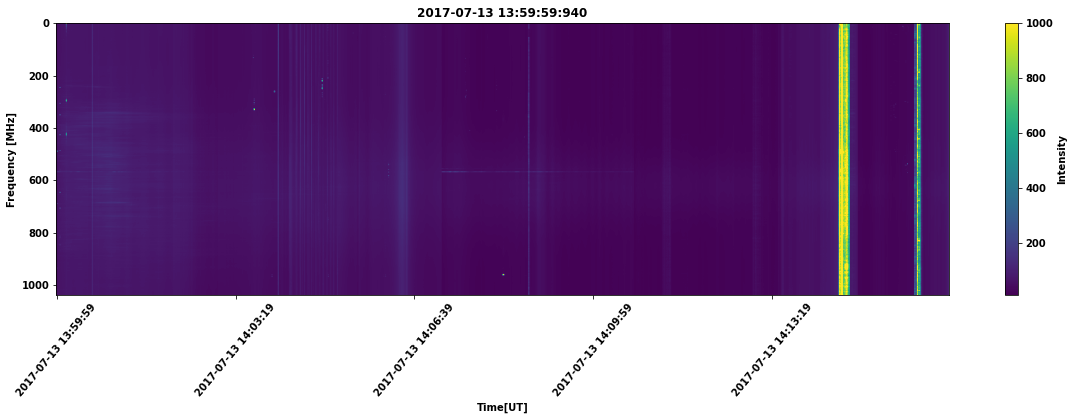

int_orf20170715_080000_10.fts


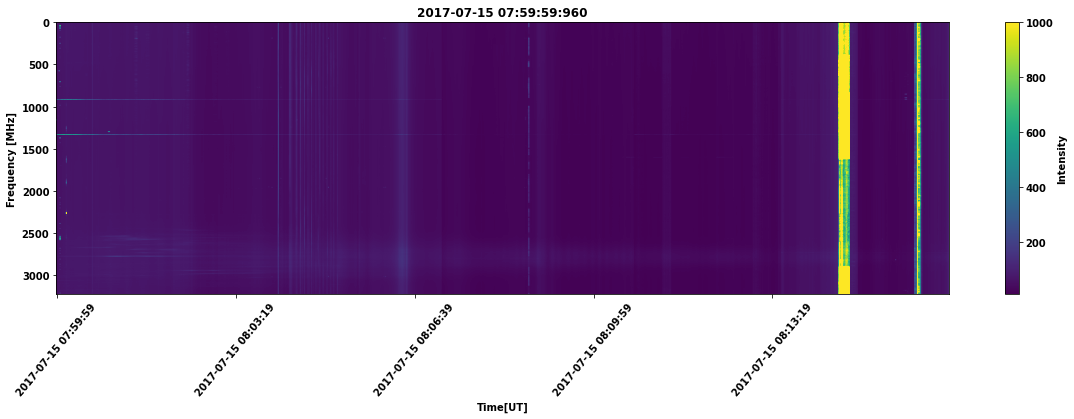

int_orf20170715_140000_10.fts


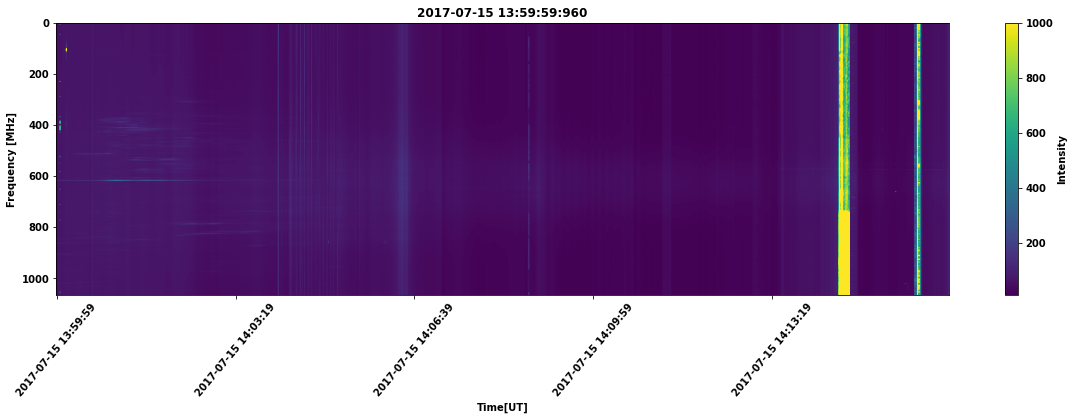

int_orf20170716_140000_10.fts


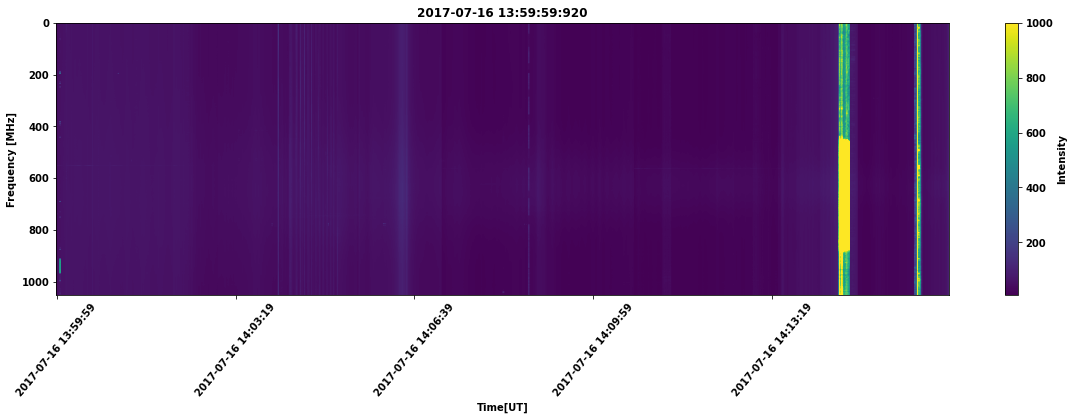

int_orf20170905_120000_10.fts


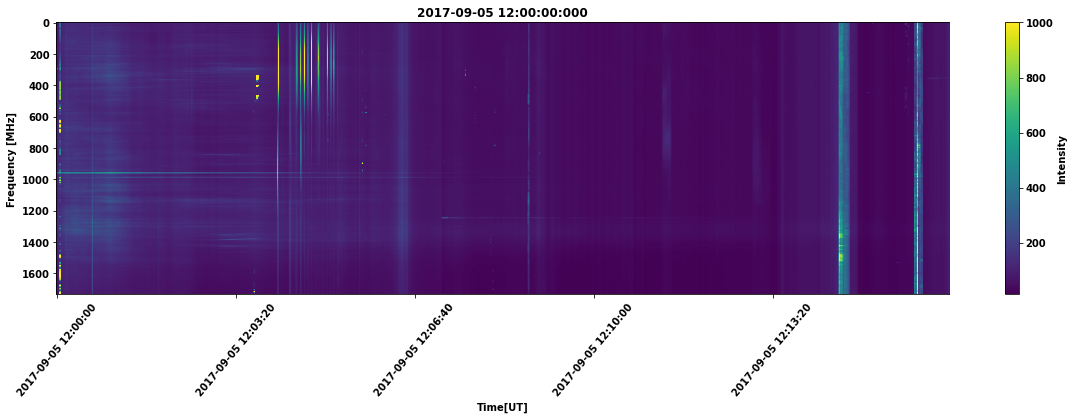

int_orf20170906_115500_10.fts


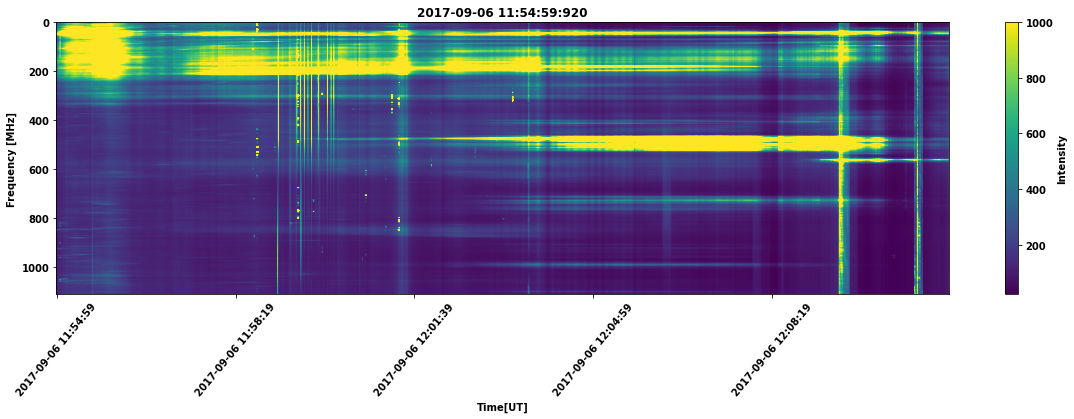

int_orf20170906_120000_10.fts


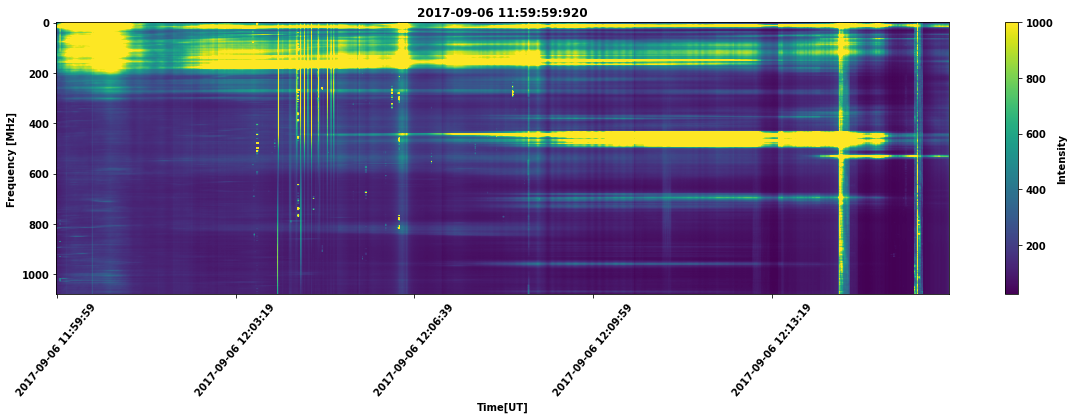

int_orf20180201_080000_10.fts


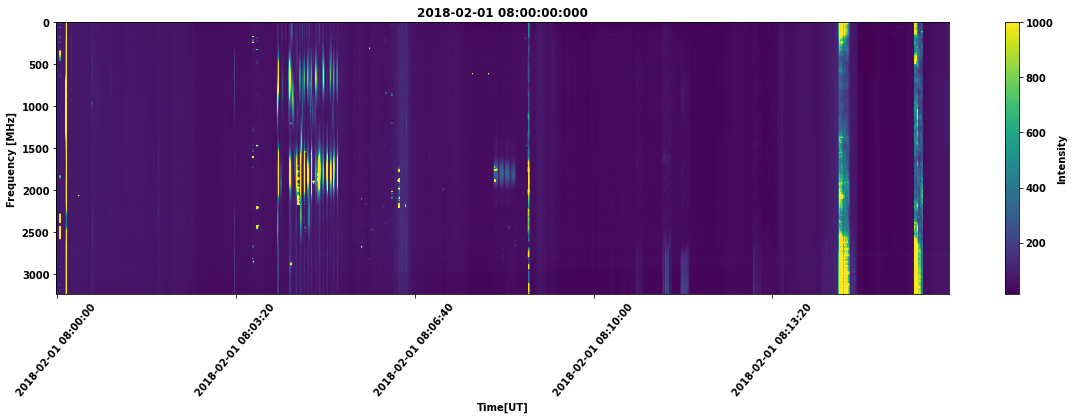

int_orf20190112_080000_10.fts


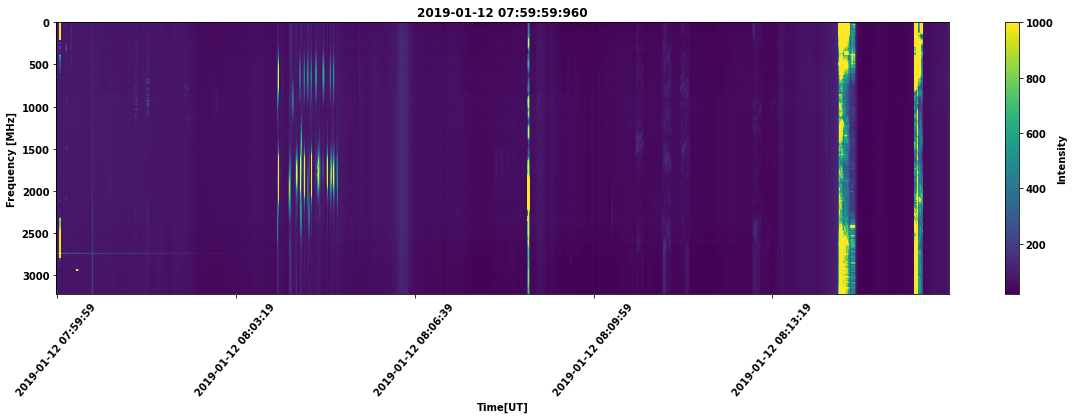

int_orf20190505_110000_10.fts


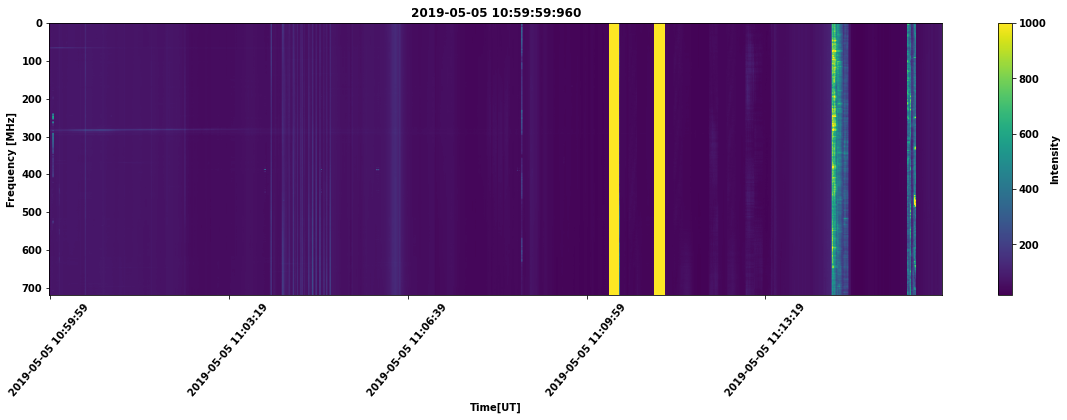

int_orf20190505_133000_10.fts


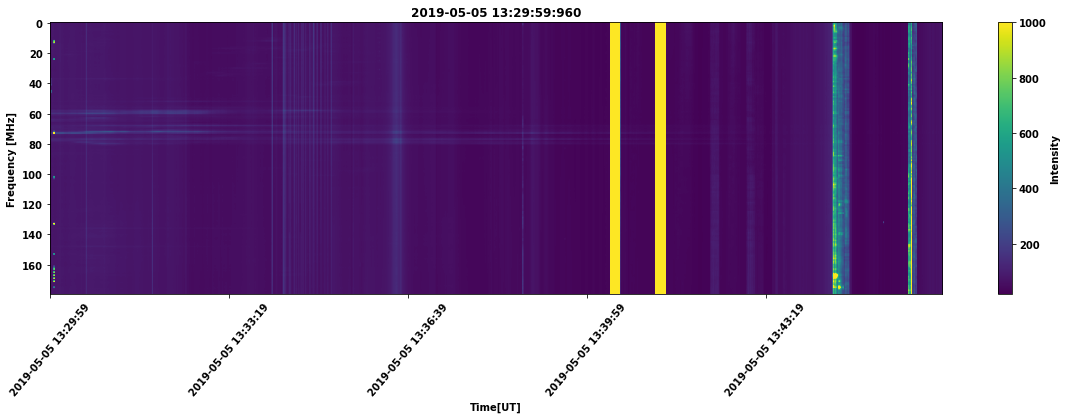

int_orf20210907_060000_10.fts


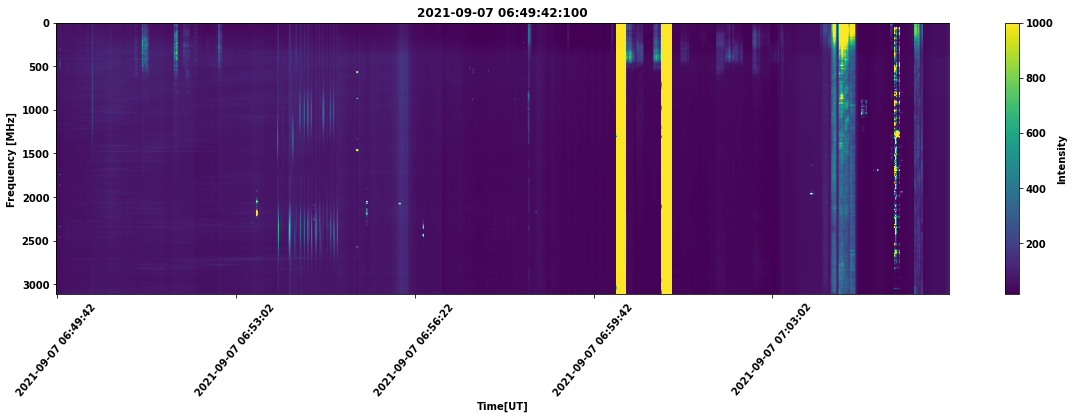

int_orf20211112_073000_10.fts


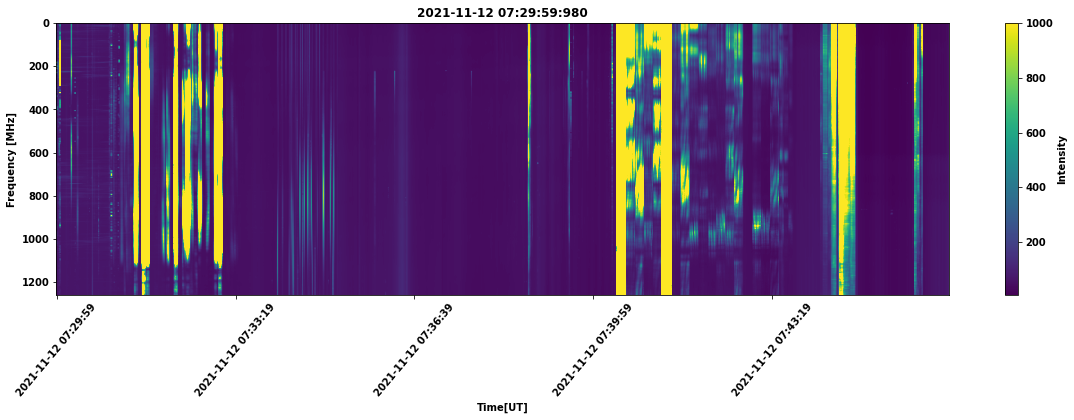

int_orf20220501_080000_10.fts


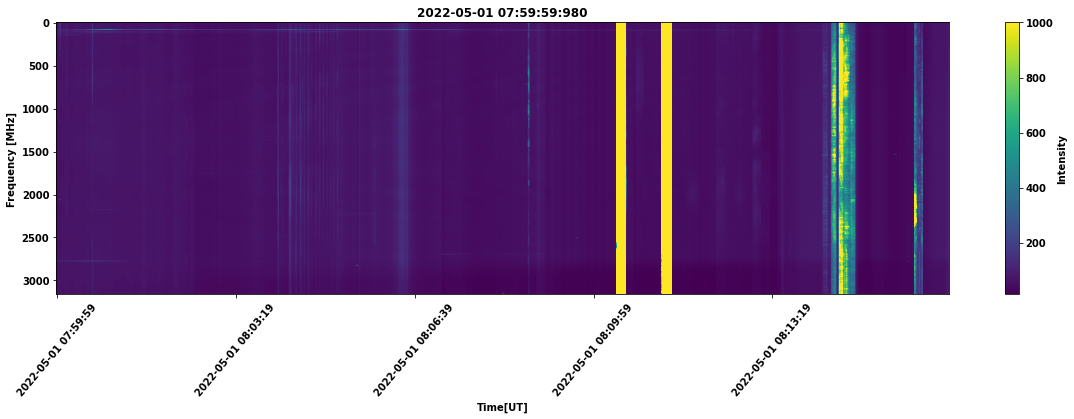

In [15]:
for root, dirs, files in os.walk(".."):
        for file in files:
            if file.endswith('.fts'):
                full_path = os.path.join(root, file)
                spec_orfees = OrfeesSpectrogram(full_path)
                print(file)
                spec_orfees.peek()

In [14]:
# for root, dirs, files in os.walk("../test_eca"):
#         for file in files:
#             if file.endswith('.fit.gz'):
#                 full_path = os.path.join(root, file)
#                 spec = CallistoSpectrogram.read(full_path)
# #                 spec.data[spec.data < 0 ] = 0 
#                 spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
#                 spec2.data[spec2.data < 0 ] = 0 
#                 # spec2_abs = spec2.data.copy()
#                 #spec2_abs[spec2_abs < 0 ] = 0 
#                 # plt.figure(figsize= (15, 10))
#                 # plt.imshow(spec2_abs)
#                 spec2.plot()
#                 plt.show()

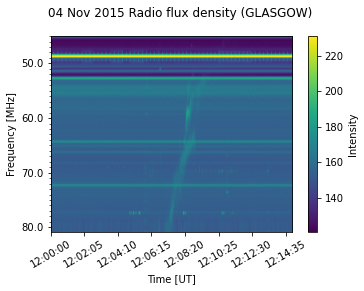

In [45]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2015/11/04/GLASGOW_20151104_120000_59.fit.gz')
spec.peek()
plt.show()

C:\Users\delbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


0 channels eliminated
Eliminating sharp jumps between channels ...
20 channels eliminated
-17.569060773480665
40.16022099447515


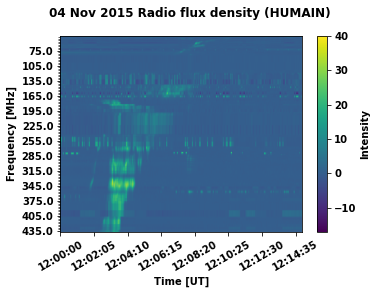

In [11]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2015/11/04/HUMAIN_20151104_120000_59.fit.gz')
spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
print(spec2.data.min())
print(spec2.data.max())
spec2.peek()
plt.show()

12 channels eliminated
Eliminating sharp jumps between channels ...
17 channels eliminated


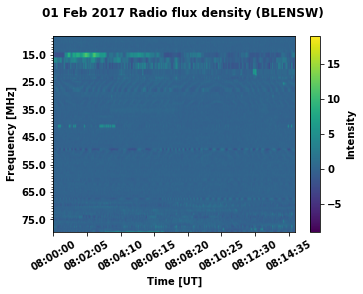

In [15]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2017/02/01/BLENSW_20170201_080000_02.fit.gz')
spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
spec2.peek()
plt.show()

14 channels eliminated
Eliminating sharp jumps between channels ...
16 channels eliminated


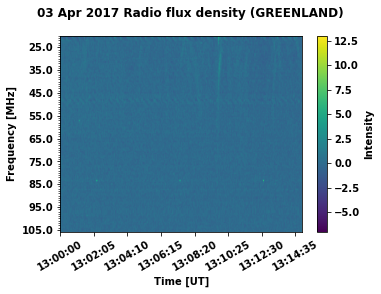

In [19]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2017/04/03/GREENLAND_20170403_130000_62.fit.gz')
spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
spec2.peek()
plt.show()

9 channels eliminated
Eliminating sharp jumps between channels ...
16 channels eliminated


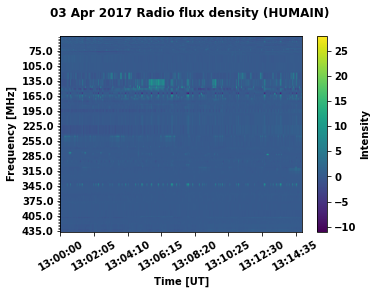

In [20]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2017/04/03/HUMAIN_20170403_130000_59.fit.gz')
spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
spec2.peek()
plt.show()

3 channels eliminated
Eliminating sharp jumps between channels ...
13 channels eliminated


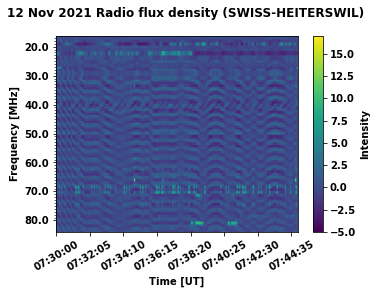

In [31]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2021/11/12/SWISS-HEITERSWIL_20211112_073000_59.fit.gz')
spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
spec2.peek()
plt.show()

8 channels eliminated
Eliminating sharp jumps between channels ...
18 channels eliminated


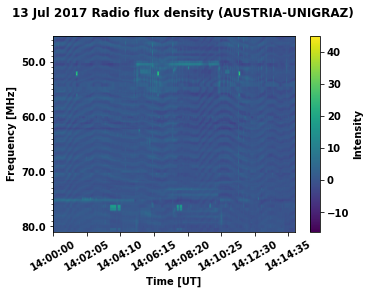

In [34]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2017/07/13/AUSTRIA-UNIGRAZ_20170713_140000_01.fit.gz')
spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
spec2.peek()
plt.show()

7 channels eliminated
Eliminating sharp jumps between channels ...
21 channels eliminated


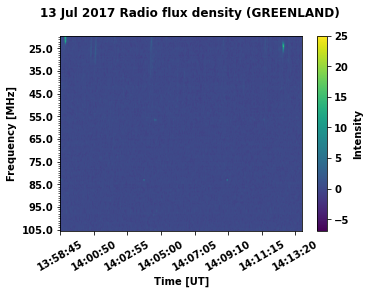

In [37]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2017/07/13/GREENLAND_20170713_135845_62.fit.gz')
spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
spec2.peek()
plt.show()

4 channels eliminated
Eliminating sharp jumps between channels ...
19 channels eliminated


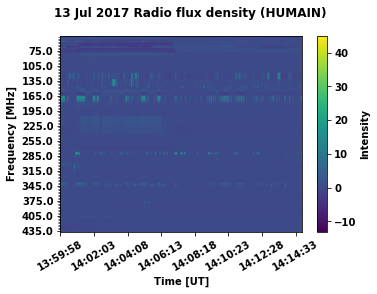

In [38]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2017/07/13/HUMAIN_20170713_135958_59.fit.gz')
spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
spec2.peek()
plt.show()

6 channels eliminated
Eliminating sharp jumps between channels ...
22 channels eliminated


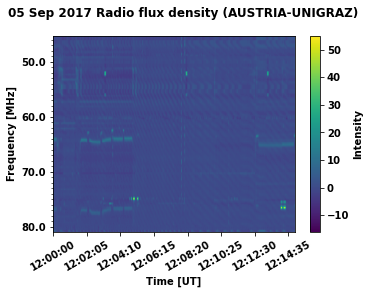

In [40]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2017/09/05/AUSTRIA-UNIGRAZ_20170905_120000_01.fit.gz')
spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
spec2.peek()
plt.show()

9 channels eliminated
Eliminating sharp jumps between channels ...
19 channels eliminated


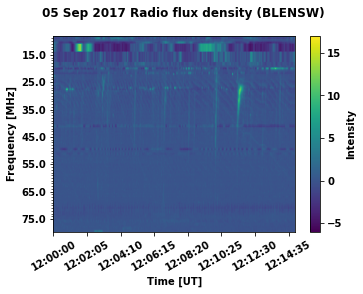

In [41]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2017/09/05/BLENSW_20170905_120000_01.fit.gz')
spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
spec2.peek()
plt.show()

1 channels eliminated
Eliminating sharp jumps between channels ...
19 channels eliminated


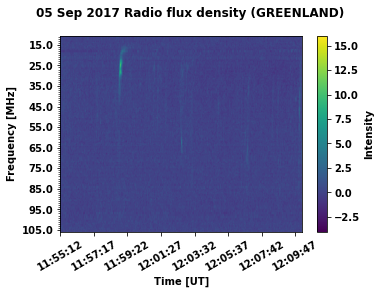

In [42]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2017/09/05/GREENLAND_20170905_115512_62.fit.gz')
spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
spec2.peek()
plt.show()

0 channels eliminated
Eliminating sharp jumps between channels ...
13 channels eliminated


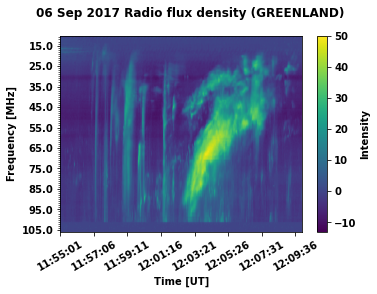

In [45]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2017/09/06/GREENLAND_20170906_115501_63.fit.gz')
spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
spec2.peek()
plt.show()

0 channels eliminated
Eliminating sharp jumps between channels ...
19 channels eliminated


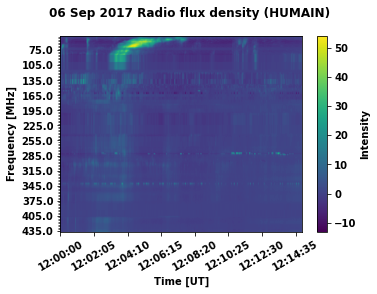

In [47]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2017/09/06/HUMAIN_20170906_120000_59.fit.gz')
spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
spec2.peek()
plt.show()

3 channels eliminated
Eliminating sharp jumps between channels ...
16 channels eliminated


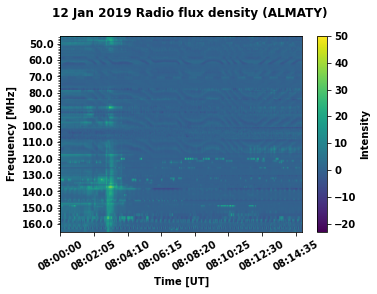

In [50]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2019/01/12/ALMATY_20190112_080000_58.fit.gz')
spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
spec2.peek()
plt.show()

9 channels eliminated
Eliminating sharp jumps between channels ...
21 channels eliminated


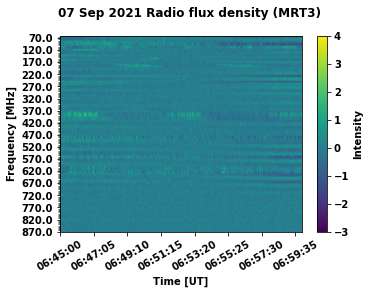

In [60]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2021/09/07/MRT3_20210907_064500_02.fit.gz')
spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
spec2.peek()
plt.show()

10 channels eliminated
Eliminating sharp jumps between channels ...
19 channels eliminated


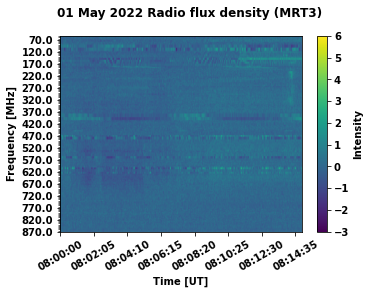

In [63]:
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2022/05/01/MRT3_20220501_080000_02.fit.gz')
spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
spec2.peek()
plt.show()

In [15]:
# spec_orfees_3 = OrfeesSpectrogram("../ORFEES/int_orf20151104_120000_0.1.fts")

# print(spec_orfees_3.data.min())
# print(spec_orfees_3.data.max())
# print(spec_orfees_3.freq_axis.min())
# print(spec_orfees_3.freq_axis.max())

# spec_orfees_3.peek()

In [ ]:
# def plot_orfees(self, **kwargs):

#         figure = plt.gcf()
#         axes = figure.add_subplot(111)
#         axes.plot(self.time, self.freq, **kwargs)
#         xa = axes.get_xaxis()
        
#         axes.set_xlabel("Time [UT]")
#         axes.set_ylabel("Frequency [MHz]")

#         return figure

# plt.plot(time_axis,freq_axis)
# plt.show()


# time_ax = spec_orfees[1]
# date_obs = spec_orfees[3]
# time_start_obs = spec_orfees[4]
# t_delta = time_axis(time_ax)

# date_start = date_obs + " "+ time_start_obs
# # print(date_start)

# time_fmt='%Y-%m-%d %H:%M:%S:%f'

# def create_time_axis(array):
#     x_delta = datetime.datetime.strptime(date_start, time_fmt) + datetime.timedelta(seconds=x)
#     return x_delta.replace(microsecond=0)

# for x in t_delta:
#     print(create_time_axis(x))


# def create_time_axis(array):
#     x_delta = datetime.datetime.strptime(date_start, time_fmt) + datetime.timedelta(seconds=x)
#     return x_delta.replace(microsecond=0)


# def time_axis(*time_array):
#     size = 0
    
#     for array in time_array:
#         size += len(array)
    
#     return np.arange(0, size*10, 10.0)